In [1]:
import pandas as pd

df = pd.read_csv('Spotify_Labeled_Dataset_2000.csv')
df = df.drop(columns = ['Unnamed: 0', 'track_id'])
print(df.shape)
df.head()

(2000, 19)


,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Mood
0,Сергей Захаров,Милая,0,2000,romance,0.263,0.404,2,-8.402,1,0.0393,0.92600,0.00531,0.215,0.226,82.820,159760,1,Sad
1,Mike Howe,The Fisherman,12,2010,acoustic,0.515,0.228,0,-21.447,0,0.0519,0.92500,0.86300,0.114,0.462,124.253,269187,3,Calm
2,Coal Chamber,Dumpster Dive,13,2015,industrial,0.482,0.689,9,-10.530,0,0.0545,0.00656,0.51800,0.136,0.107,130.074,69669,4,Calm
3,Celer,"A Crush, a Hero-Worship & Hyperrealism",3,2008,ambient,0.167,0.343,9,-25.948,1,0.0693,0.86000,0.97100,0.083,0.034,125.993,350560,3,Sad
4,Luca Stricagnoli,Stars,11,2017,guitar,0.457,0.719,0,-9.791,1,0.0348,0.01790,0.83700,0.105,0.488,174.987,209533,4,Energetic


In [2]:
Y = df['Mood']
X = df.drop(columns = 'Mood')
X.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Сергей Захаров,Милая,0,2000,romance,0.263,0.404,2,-8.402,1,0.0393,0.92600,0.00531,0.215,0.226,82.820,159760,1
1,Mike Howe,The Fisherman,12,2010,acoustic,0.515,0.228,0,-21.447,0,0.0519,0.92500,0.86300,0.114,0.462,124.253,269187,3
2,Coal Chamber,Dumpster Dive,13,2015,industrial,0.482,0.689,9,-10.530,0,0.0545,0.00656,0.51800,0.136,0.107,130.074,69669,4
3,Celer,"A Crush, a Hero-Worship & Hyperrealism",3,2008,ambient,0.167,0.343,9,-25.948,1,0.0693,0.86000,0.97100,0.083,0.034,125.993,350560,3
4,Luca Stricagnoli,Stars,11,2017,guitar,0.457,0.719,0,-9.791,1,0.0348,0.01790,0.83700,0.105,0.488,174.987,209533,4


In [3]:
Y.head()

0          Sad
1         Calm
2         Calm
3          Sad
4    Energetic
Name: Mood, dtype: object

In [4]:
from sklearn.model_selection import train_test_split
X.drop(columns = ['artist_name', 'track_name', 'year', 'genre'], inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [5]:
X_train.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1500,25,0.457,0.795,3,-4.990,1,0.0361,0.00472,0.347000,0.179,0.653,133.965,245067,4
451,22,0.622,0.925,1,-5.441,1,0.1090,0.01590,0.683000,0.257,0.512,124.017,295187,4
1627,1,0.697,0.444,2,-15.500,1,0.0706,0.72400,0.000000,0.318,0.584,97.917,78227,5
669,1,0.320,0.810,10,-7.454,1,0.1540,0.02130,0.172000,0.566,0.472,133.253,435960,4
1567,12,0.480,0.972,1,-2.423,1,0.0731,0.01050,0.000102,0.170,0.429,122.021,250450,4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = X_train.corr()
corr

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
popularity,1.000000,0.134250,0.042254,-0.011501,0.124755,-0.021140,-0.035507,-0.086879,-0.174389,-0.063144,0.041117,0.020389,-0.116892,0.044668
danceability,0.134250,1.000000,0.154954,0.013623,0.267713,-0.088096,0.107904,-0.182604,-0.207876,-0.057135,0.532539,0.033093,-0.009913,0.168375
energy,0.042254,0.154954,1.000000,0.033803,0.782918,-0.032283,0.090412,-0.739423,-0.204762,0.178250,0.291839,0.269449,-0.035359,0.127688
key,-0.011501,0.013623,0.033803,1.000000,0.042594,-0.150876,0.016409,-0.033863,0.007103,0.004685,0.013230,0.044756,0.027704,0.004747
loudness,0.124755,0.267713,0.782918,0.042594,1.000000,-0.031170,0.008158,-0.615706,-0.424124,0.076525,0.332517,0.248814,-0.075879,0.138884
mode,-0.021140,-0.088096,-0.032283,-0.150876,-0.031170,1.000000,-0.047547,0.075719,-0.049912,-0.010714,0.006607,0.045806,-0.013912,-0.038556
speechiness,-0.035507,0.107904,0.090412,0.016409,0.008158,-0.047547,1.000000,0.025599,-0.145522,0.275213,0.067745,-0.056695,-0.022236,-0.060894
acousticness,-0.086879,-0.182604,-0.739423,-0.033863,-0.615706,0.075719,0.025599,1.000000,0.125664,-0.015299,-0.128334,-0.242909,-0.014136,-0.144183
instrumentalness,-0.174389,-0.207876,-0.204762,0.007103,-0.424124,-0.049912,-0.145522,0.125664,1.000000,-0.130044,-0.335303,-0.080365,0.130802,-0.075755
liveness,-0.063144,-0.057135,0.178250,0.004685,0.076525,-0.010714,0.275213,-0.015299,-0.130044,1.000000,0.033951,-0.025425,0.043469,-0.008466


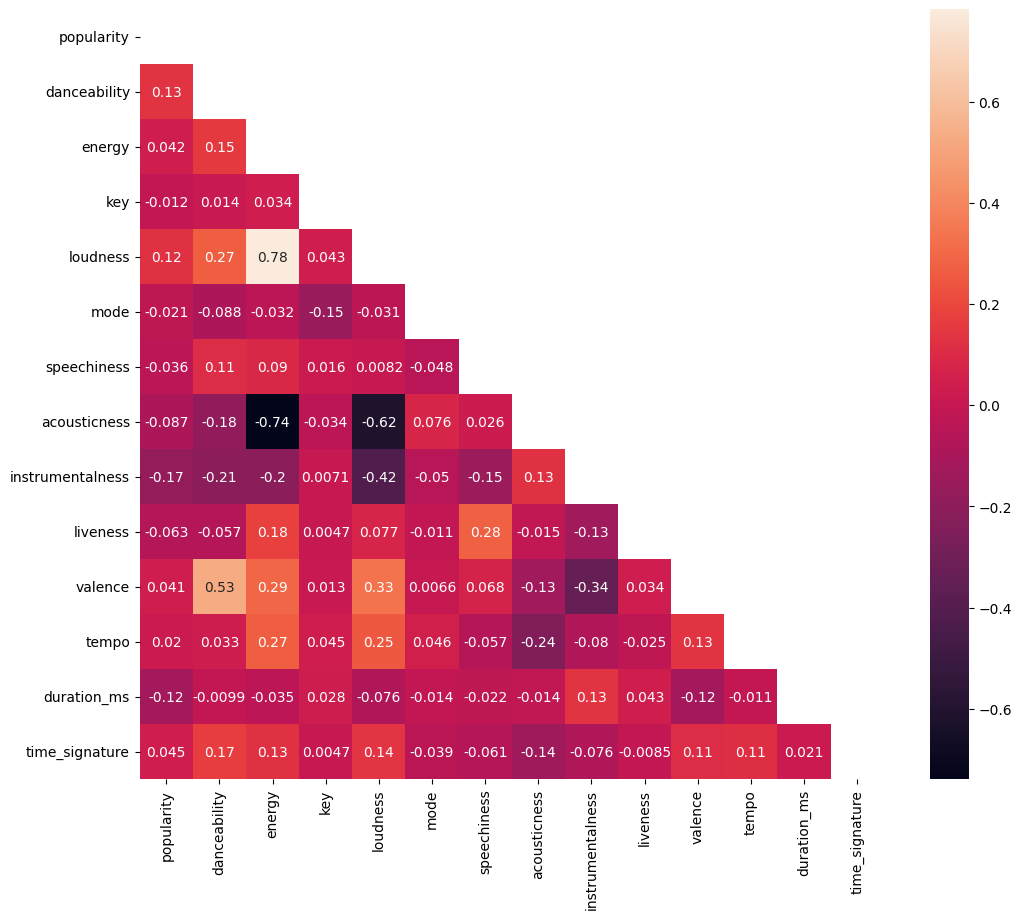

In [9]:
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, mask = mask1);

# Feature Selection using Information Gain

In [15]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train, random_state = 20)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

energy              0.542958
valence             0.451095
acousticness        0.325131
loudness            0.293206
tempo               0.197992
danceability        0.080057
speechiness         0.056511
instrumentalness    0.055874
time_signature      0.030468
liveness            0.027944
mode                0.025343
duration_ms         0.019983
key                 0.007746
popularity          0.000000
dtype: float64

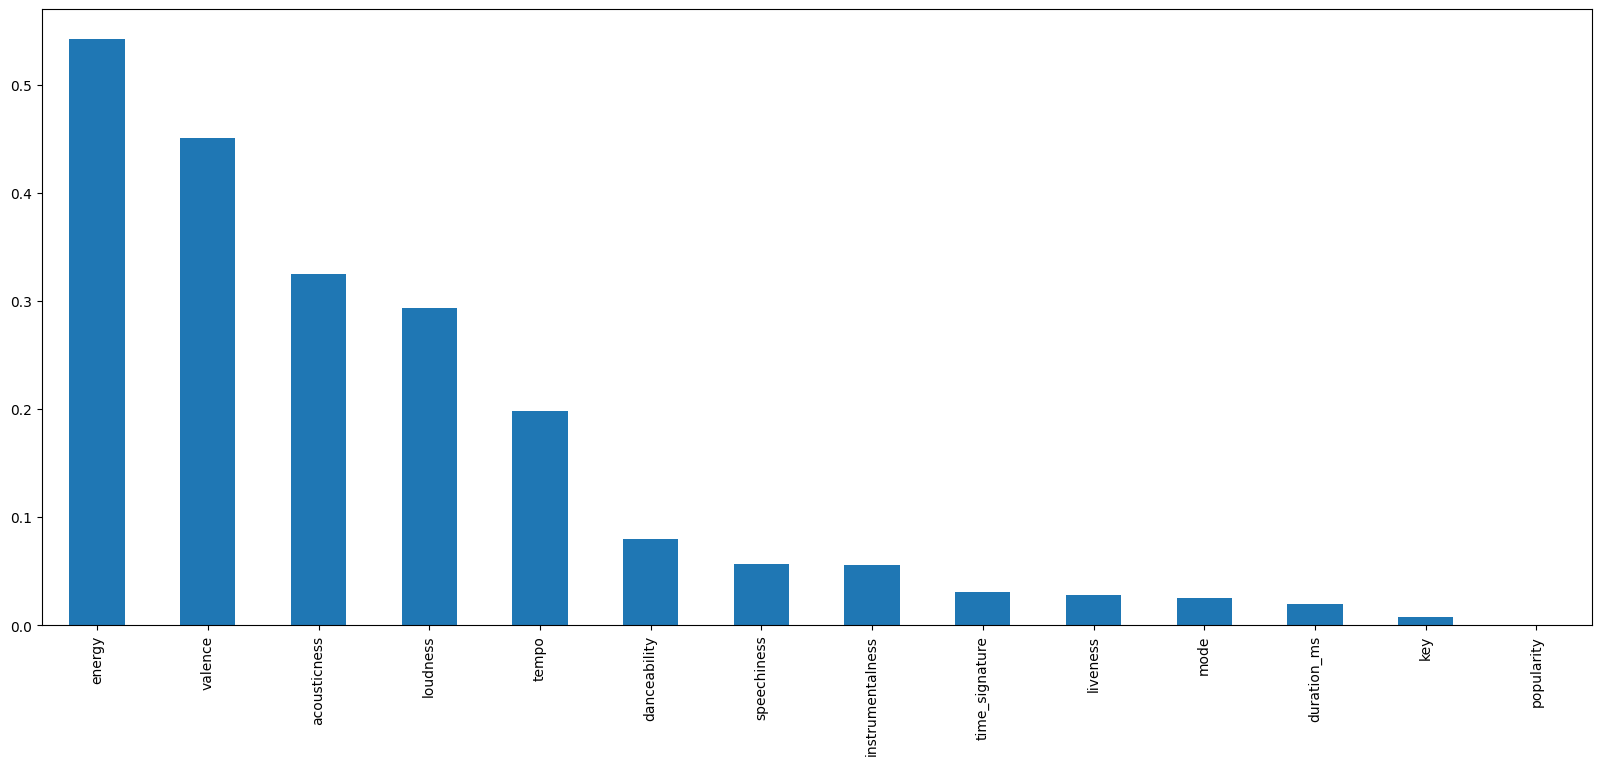

In [16]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();